In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\pm10_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/pm10_meteorolgical_monthly.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## PM10

In [5]:
pm10_monthly

,tanggal,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,41.9,42,4.7,5,2372.3,30,51.0,22,21.8,14,27.4,80.2,14.4,2.5
1,2010-02-28,56.2,53,6.0,7,2825.5,36,97.1,41,28.7,19,28.2,80.3,9.6,2.6
2,2010-03-31,59.3,55,8.0,9,2897.4,36,101.1,42,29.2,19,28.6,78.5,9.4,2.6
3,2010-04-30,59.5,55,12.4,13,2720.0,34,118.3,49,27.1,18,29.6,74.5,2.2,2.7
4,2010-05-31,65.2,58,16.3,16,2907.7,37,124.3,52,31.1,20,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-31,68.8,59,19.7,20,1680.0,22,143.1,60,25.3,16,28.3,68.8,0.0,1.4
116,2019-09-30,64.3,57,21.6,21,1523.2,20,140.4,59,22.5,15,28.8,68.9,0.0,1.2
117,2019-10-31,73.4,62,21.6,21,1540.0,20,159.5,67,23.6,15,29.5,70.0,0.0,1.2
118,2019-11-30,65.6,58,23.5,23,1363.2,18,162.7,69,24.0,16,29.5,70.8,2.0,1.3


In [6]:
pm10_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   pm10(ug/m3)                     120 non-null    float64
 2   pm10_ispu                       120 non-null    int64  
 3   so2(ug/m3)                      120 non-null    float64
 4   so2_ispu                        120 non-null    int64  
 5   co(ug/m3)                       120 non-null    float64
 6   co_ispu                         120 non-null    int64  
 7   o3(ug/m3)                       120 non-null    float64
 8   o3_ispu                         120 non-null    int64  
 9   no2(ug/m3)                      120 non-null    float64
 10  no2_ispu                        120 non-null    int64  
 11  temperatur_rata-rata(°C)        120 non-null    float64
 12  kelembapan_rata-rata(%)         120 

In [7]:
pm10_monthly['tanggal'] = pd.to_datetime(pm10_monthly['tanggal'], dayfirst=True)
pm10_monthly.set_index('tanggal', inplace=True)

In [8]:
pm10_monthly.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.696667,53.766667,17.369167,17.350000,2140.963333,27.225000,123.872500,52.133333,20.342500,13.441667,28.484167,75.831667,5.907500,1.881667
std,14.937353,9.465313,9.064084,8.516568,458.311636,5.590301,40.796987,17.162071,10.281407,6.340209,0.658365,4.315148,5.617263,0.680457
min,28.400000,29.000000,1.600000,3.000000,1150.500000,15.000000,31.100000,14.000000,2.700000,3.000000,26.600000,66.300000,0.000000,0.900000
25%,50.250000,50.000000,9.000000,9.000000,1772.150000,23.000000,95.125000,40.000000,7.500000,5.750000,28.175000,72.750000,1.800000,1.300000
50%,59.450000,55.000000,16.850000,17.000000,2168.800000,27.500000,126.200000,52.500000,24.050000,16.000000,28.600000,76.300000,5.050000,1.600000
75%,70.500000,60.250000,23.075000,23.000000,2529.600000,32.000000,156.550000,66.000000,28.925000,19.000000,28.900000,78.600000,8.525000,2.600000
max,103.200000,77.000000,40.800000,39.000000,3062.400000,39.000000,203.900000,86.000000,37.500000,24.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
pm10_monthly.corr(method='spearman')

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.998846,0.073242,0.066274,0.217009,0.214419,0.320464,0.323119,0.506270,0.496773,0.337487,-0.365542,-0.457840,-0.117375
pm10_ispu,0.998846,1.000000,0.077028,0.070341,0.217985,0.215218,0.318720,0.321275,0.500334,0.491054,0.337593,-0.359719,-0.450833,-0.118786
so2(ug/m3),0.073242,0.077028,1.000000,0.998928,-0.111072,-0.105254,-0.053265,-0.049911,-0.151968,-0.145419,0.141579,-0.234168,-0.149000,-0.087005
so2_ispu,0.066274,0.070341,0.998928,1.000000,-0.105754,-0.099560,-0.061366,-0.058153,-0.151439,-0.145055,0.137976,-0.227800,-0.139096,-0.082798
co(ug/m3),0.217009,0.217985,-0.111072,-0.105754,1.000000,0.998476,0.213741,0.212842,0.474615,0.480847,-0.105411,0.360797,0.340931,0.460545
co_ispu,0.214419,0.215218,-0.105254,-0.099560,0.998476,1.000000,0.210402,0.209816,0.473710,0.480386,-0.107821,0.362407,0.341291,0.457511
o3(ug/m3),0.320464,0.318720,-0.053265,-0.061366,0.213741,0.210402,1.000000,0.999715,0.457211,0.452113,0.314346,-0.331460,-0.274015,0.319836
o3_ispu,0.323119,0.321275,-0.049911,-0.058153,0.212842,0.209816,0.999715,1.000000,0.458917,0.454162,0.314866,-0.331565,-0.275958,0.316290
no2(ug/m3),0.506270,0.500334,-0.151968,-0.151439,0.474615,0.473710,0.457211,0.458917,1.000000,0.995838,0.260025,-0.250964,-0.261007,0.344120
no2_ispu,0.496773,0.491054,-0.145419,-0.145055,0.480847,0.480386,0.452113,0.454162,0.995838,1.000000,0.255304,-0.240835,-0.250228,0.345154


In [10]:
pm10_monthly.drop(['pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu', 'kecepatan_angin_rata-rata(m/s)'], axis=1, inplace=True)

### Visualize

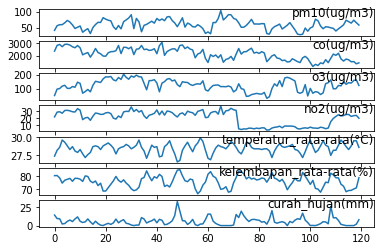

In [11]:
groups = [i for i in range(len(pm10_monthly.columns))]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(pm10_monthly.values[:, group])
    plt.title(pm10_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [12]:
WINDOW_SIZE = 1
FEATURES = pm10_monthly.shape[1]

# convert series to supervised learning
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = pm10_monthly.values
# frame as supervised learning
reframed = series_to_supervised(pm10_monthly.index, values, WINDOW_SIZE)
# drop columns we don't want to predict
reframed = reframed.iloc[:, :-1*(FEATURES-1)]
'''reframed_x.reset_index(inplace=True)
reframed_y = reframed.iloc[:, 180:-5:6]
reframed_y.reset_index(inplace=True)
reframed = reframed_x.merge(reframed_y)
reframed.set_index('tanggal', inplace=True)'''
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,
2010-02-28,41.9,2372.3,51.0,21.8,27.4,80.2,14.4,56.2
2010-03-31,56.2,2825.5,97.1,28.7,28.2,80.3,9.6,59.3
2010-04-30,59.3,2897.4,101.1,29.2,28.6,78.5,9.4,59.5
2010-05-31,59.5,2720.0,118.3,27.1,29.6,74.5,2.2,65.2
2010-06-30,65.2,2907.7,124.3,31.1,29.3,76.7,2.8,72.6
...,...,...,...,...,...,...,...,...
2019-08-31,73.2,1741.5,131.7,25.3,28.7,67.9,0.0,68.8
2019-09-30,68.8,1680.0,143.1,25.3,28.3,68.8,0.0,64.3
2019-10-31,64.3,1523.2,140.4,22.5,28.8,68.9,0.0,73.4


In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,
2010-02-28,0.180481,0.639050,0.115162,0.548851,0.242424,0.751351,0.436364,0.371658
2010-03-31,0.371658,0.876092,0.381944,0.747126,0.484848,0.756757,0.290909,0.413102
2010-04-30,0.413102,0.913698,0.405093,0.761494,0.606061,0.659459,0.284848,0.415775
2010-05-31,0.415775,0.820911,0.504630,0.701149,0.909091,0.443243,0.066667,0.491979
2010-06-30,0.491979,0.919086,0.539352,0.816092,0.818182,0.562162,0.084848,0.590909
...,...,...,...,...,...,...,...,...
2019-08-31,0.598930,0.309117,0.582176,0.649425,0.636364,0.086486,0.000000,0.540107
2019-09-30,0.540107,0.276950,0.648148,0.649425,0.515152,0.135135,0.000000,0.479947
2019-10-31,0.479947,0.194937,0.632523,0.568966,0.666667,0.140541,0.000000,0.601604


In [14]:
from datetime import datetime

train_end = datetime.strptime('2011-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2012-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(23, 7) (23, 1) (96, 7) (96, 1)


In [15]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from sklearn.svm import SVR
import keras_tuner as kt

def call_existing_code(kernel, degree, gamma, coef0, tol, C, epsilon, shrinking):
    model = SVR(
        kernel=kernel,
        degree=degree, # poly
        gamma=gamma, # rbf, poly
        coef0=coef0, # poly
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

def build_model(hp):
    kernel = hp.Choice("kernel", ["poly", "rbf", "linear"], default="rbf")
    degree = hp.Int("degree", min_value=1, max_value=10, step=1, default=3)
    gamma = hp.Choice("gamma", ["scale", "auto"], default="scale")
    # gamma = hp.Choice("gamma", [1.0, 0.1, 0.01, 0.001, 0.0001])
    coef0 = hp.Float("coef0", min_value=0.0, max_value=1.0, step=0.1, default=0.0)
    tol = hp.Float("tol", min_value=1e-4, max_value=1e-2, default=1e-3)
    C = hp.Choice("C", [0.1, 1.0, 10.0, 100.0, 1000.0], default=1.0)
    epsilon = hp.Float("epsilon", min_value=1e-3, max_value=1.0, default=1e-1)
    shrinking = hp.Boolean("shrinking", default=True)
    model = call_existing_code(
        kernel=kernel,
        degree=degree,
        gamma=gamma,
        coef0=coef0,
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

build_model(kt.HyperParameters())

SVR()

In [17]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

if platform.system() == 'Windows':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model",
    project_name="svr_pm10_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    overwrite=False,
    directory="/content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model",
    project_name="svr_pm10_monthly_80-20_result"
    )

tuner.search(train_X, train_y)

In [18]:
tuner.results_summary()

Results summary
Results in /content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model/svr_pm10_monthly_80-20_result
Showing 10 best trials
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: scale
coef0: 1.0
tol: 0.004027019615660383
C: 0.1
epsilon: 0.001
shrinking: False
Score: 0.008797086822930612
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: scale
coef0: 0.7000000000000001
tol: 0.0018866884836830256
C: 0.1
epsilon: 0.001
shrinking: False
Score: 0.001026936285334834
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: scale
coef0: 1.0
tol: 0.0015572803530207254
C: 0.1
epsilon: 0.001
shrinking: False
Score: -0.00018663830252694247
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: scale
coef0: 1.0
tol: 0.0001
C: 0.1
epsilon: 0.001
shrinking: False
Score: -0.00020716267602276516
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: scale
coef0: 1.0
tol: 0.0001
C: 0.1
epsilon: 0.001
shrinking:

In [19]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

SVR(C=0.1, coef0=1.0, degree=10, epsilon=0.001, kernel='linear',
    shrinking=False, tol=0.004027019615660383)

In [20]:
best_model = SVR(kernel='linear', tol=0.008, C=0.1, epsilon=0.1006, shrinking=False)
best_model.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, epsilon=0.1006, kernel='linear', shrinking=False, tol=0.008)

In [21]:
import numpy as np

train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = best_model.predict(train_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

train_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[:train_end].index)

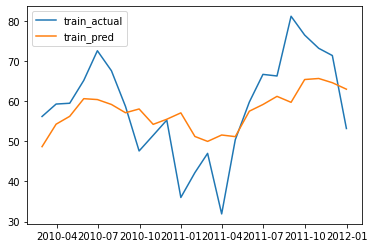

In [22]:
plt.plot(train_result['actual'], label='train_actual')
plt.plot(train_result['pred'], label='train_pred')
plt.legend()
plt.show()

In [23]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
from sklearn.metrics import r2_score

rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Train R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

Train R-Squared: 37.073%
Train RMSE: 9.880
Train MAPE: 15.015%


In [25]:
rmse_each_month = []
for index, value in train_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
train_result['rmse'] = rmse_each_month

In [26]:
mape_each_month = []
for index, value in train_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
train_result['mape'] = mape_each_month

In [27]:
train_result

,actual,pred,rmse,mape
tanggal,,,,
2010-02-28,56.2,48.675120,7.52,13.39%
2010-03-31,59.3,54.278286,5.02,8.47%
2010-04-30,59.5,56.240328,3.26,5.48%
2010-05-31,65.2,60.641427,4.56,6.99%
2010-06-30,72.6,60.420482,12.18,16.78%
2010-07-31,67.6,59.197479,8.40,12.43%
2010-08-31,58.7,57.130978,1.57,2.67%
2010-09-30,47.6,58.073822,10.47,22.0%
2010-10-31,51.5,54.236442,2.74,5.31%


In [28]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = best_model.predict(test_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

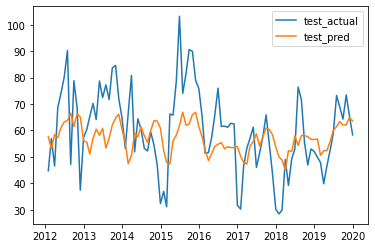

In [29]:
plt.plot(test_result['actual'], label='test_actual')
plt.plot(test_result['pred'], label='test_pred')
plt.legend()
plt.show()

In [30]:
rmse_each_month = []
for index, value in test_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
test_result['rmse'] = rmse_each_month

In [31]:
mape_each_month = []
for index, value in test_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
test_result['mape'] = mape_each_month

In [32]:
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test MAPE: {mape(inv_y, inv_yhat):.3f}%')

Test R-Squared: 15.817%
Test RMSE: 14.0854
Test MAPE: 20.491%


In [33]:
test_result

,actual,pred,rmse,mape
tanggal,,,,
2012-01-31,44.7,57.646688,12.95,28.96%
2012-02-29,56.9,53.036186,3.86,6.79%
2012-03-31,46.5,58.455763,11.96,25.71%
2012-04-30,68.6,57.283184,11.32,16.5%
2012-05-31,74.2,61.095330,13.10,17.66%
...,...,...,...,...
2019-08-31,68.8,63.346752,5.45,7.93%
2019-09-30,64.3,62.038676,2.26,3.52%
2019-10-31,73.4,62.128682,11.27,15.36%
